In [1]:
import sys
sys.path.append("..")
from models.optimisers import GridSearch
from models.knn import KNearestNeighbours
from models.classification_tree import ClassificationTree
from models.logistic_regression import SoftmaxRegression
from data_processing.preprocessing import *
from data_processing.train_test_split import train_test_split
from data_processing.cross_validation import k_folds_accuracy_scores, k_folds_accuracy_score
import numpy as np

X, y = load_dataset("../datasets/ionosphere.txt",target_col=-1, sep=',')
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2, 3456)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 0.2, 4567)
preprocessor = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("converter", NumericConverter()),
    ("scaler", MinMaxScaler())
])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


In [2]:

# Define the parameter grids for each model
knn_param_grid = {
    'k': [1, 3, 5, 7, 9]
}

tree_param_grid = {
    'max_depth': [ 3, 5, 10, 15, 20],
    'min_size': [2, 5, 10]
}

softmax_param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_iterations': [100, 500, 1000, 5000]
}

# Create instances of your models
knn_model = KNearestNeighbours()
tree_model = ClassificationTree()
softmax_model = SoftmaxRegression()

# Create GridSearch objects for each model
knn_grid_search = GridSearch(model=knn_model, param_grid=knn_param_grid)
tree_grid_search = GridSearch(model=tree_model, param_grid=tree_param_grid)
softmax_grid_search = GridSearch(model=softmax_model, param_grid=softmax_param_grid)

# Perform grid search for each model
knn_grid_search.fit(X_train, y_train, X_val, y_val)
tree_grid_search.fit(X_train, y_train, X_val, y_val)
softmax_grid_search.fit(X_train, y_train, X_val, y_val)
# Display the best parameters and score for each model
print("KNN - Best Parameters:")
print(knn_grid_search.best_params_)
print("KNN - Best Score:")
print(knn_grid_search.best_score_)

print("Classification Tree - Best Parameters:")
print(tree_grid_search.best_params_)
print("Classification Tree - Best Score:")
print(tree_grid_search.best_score_)

print("Softmax Regression - Best Parameters:")
print(softmax_grid_search.best_params_)
print("Softmax Regression - Best Score:")
print(softmax_grid_search.best_score_)

# Access the best models
best_knn_model = knn_grid_search.best_model_
best_tree_model = tree_grid_search.best_model_
best_softmax_model = softmax_grid_search.best_model_

# Evaluate the best models on test data
test_score_knn = knn_grid_search.score(X_test, y_test)
test_score_tree = tree_grid_search.score(X_test, y_test)
test_score_softmax = softmax_grid_search.score(X_test, y_test)

print("KNN - Test Score:")
print(test_score_knn)
print("Classification Tree - Test Score:")
print(test_score_tree)
print("Softmax Regression - Test Score:")
print(test_score_softmax)

# Display the parameter grids
print("KNN - Parameter Grid:")
knn_grid_search.display_param_grid()
print("Classification Tree - Parameter Grid:")
tree_grid_search.display_param_grid()
print("Softmax Regression - Parameter Grid:")
softmax_grid_search.display_param_grid()


KNN - Best Parameters:
{'k': 1}
KNN - Best Score:
0.9107142857142857
Classification Tree - Best Parameters:
{'max_depth': 5, 'min_size': 2}
Classification Tree - Best Score:
0.9285714285714286
Softmax Regression - Best Parameters:
{'learning_rate': 0.1, 'n_iterations': 5000}
Softmax Regression - Best Score:
0.875
KNN - Test Score:
0.8142857142857143
Classification Tree - Test Score:
0.8571428571428571
Softmax Regression - Test Score:
0.8571428571428571
KNN - Parameter Grid:
Parameter Grid:
k: [1, 3, 5, 7, 9]
Classification Tree - Parameter Grid:
Parameter Grid:
max_depth: [3, 5, 10, 15, 20]
min_size: [2, 5, 10]
Softmax Regression - Parameter Grid:
Parameter Grid:
learning_rate: [0.01, 0.1, 1]
n_iterations: [100, 500, 1000, 5000]


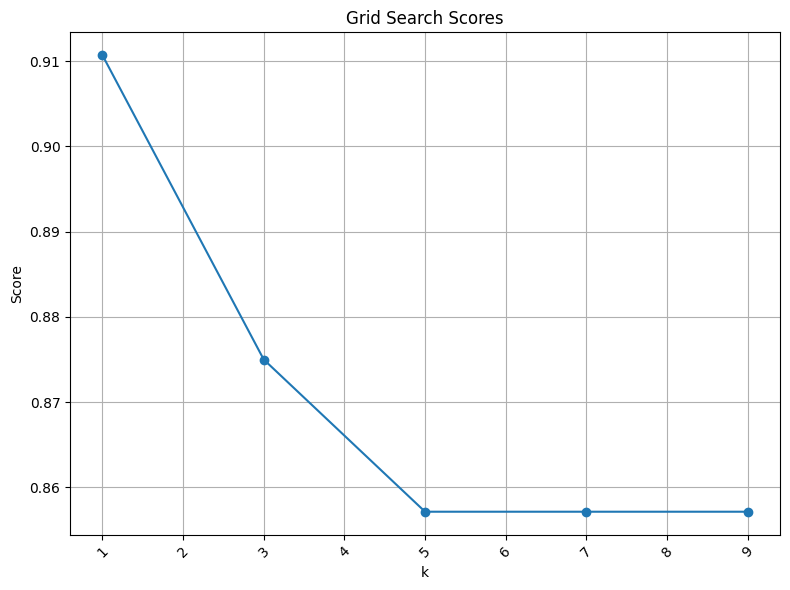

[[0.91071429 0.91071429 0.89285714]
 [0.92857143 0.92857143 0.92857143]
 [0.92857143 0.92857143 0.92857143]
 [0.92857143 0.92857143 0.92857143]
 [0.92857143 0.92857143 0.92857143]]


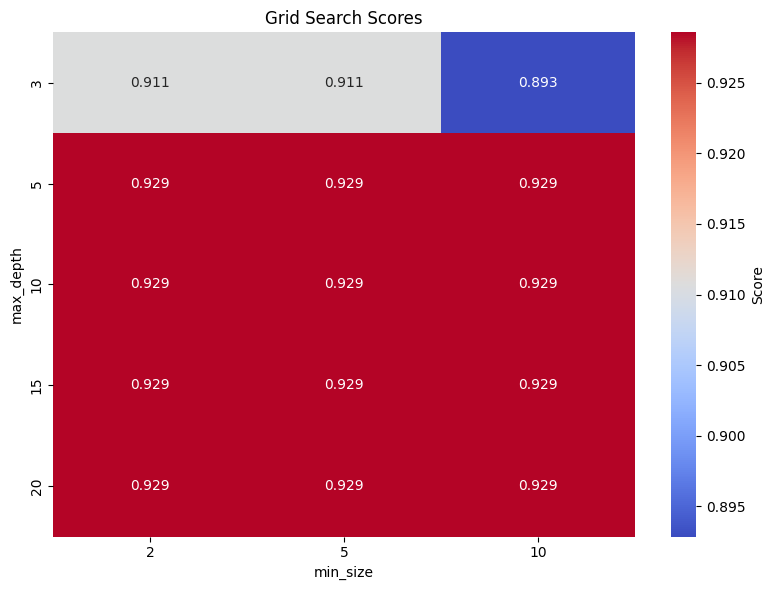

[[0.67857143 0.69642857 0.76785714 0.82142857]
 [0.76785714 0.82142857 0.85714286 0.875     ]
 [0.67857143 0.69642857 0.71428571 0.71428571]]


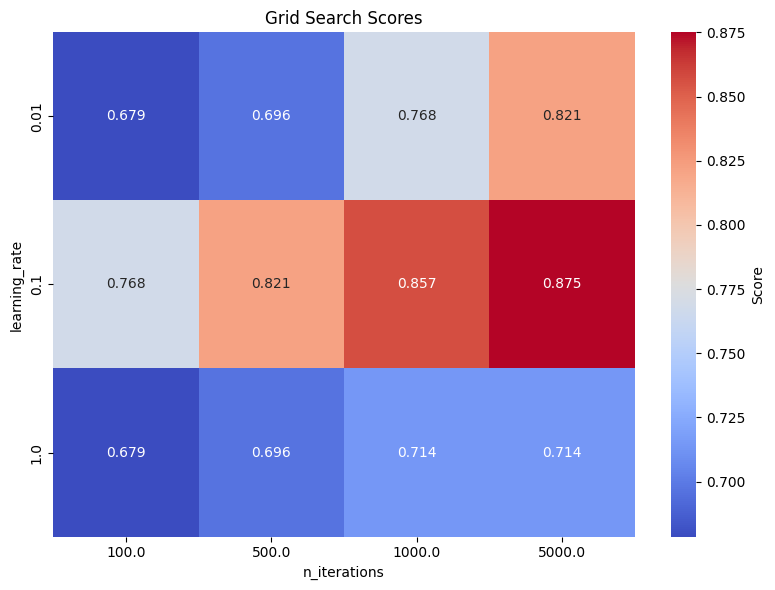

In [3]:
knn_grid_search.plot_param_grid_heatmap()
tree_grid_search.plot_param_grid_heatmap()
softmax_grid_search.plot_param_grid_heatmap()


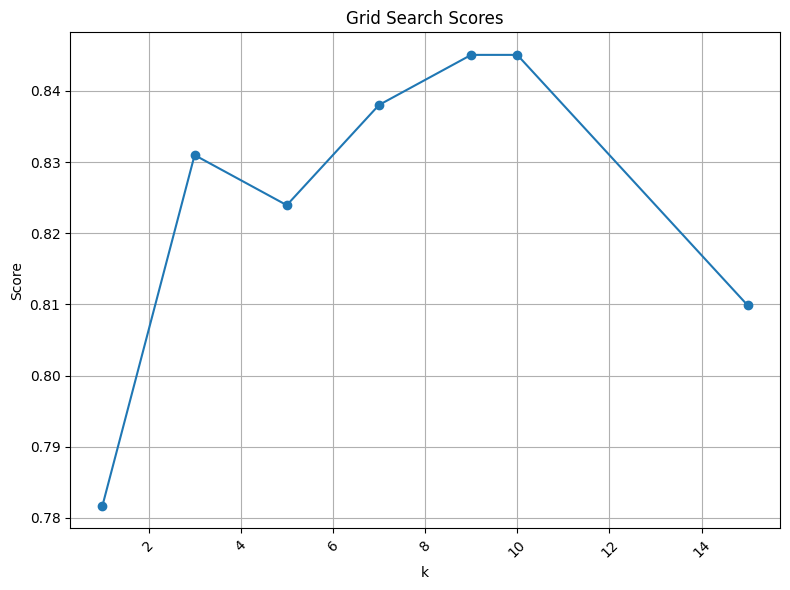

[[0.78169014 0.78169014 0.78169014 0.78169014]
 [0.73239437 0.74647887 0.74647887 0.74647887]
 [0.75352113 0.76760563 0.75352113 0.76056338]
 [0.75352113 0.76760563 0.76056338 0.76056338]
 [0.75352113 0.76760563 0.76056338 0.76056338]]


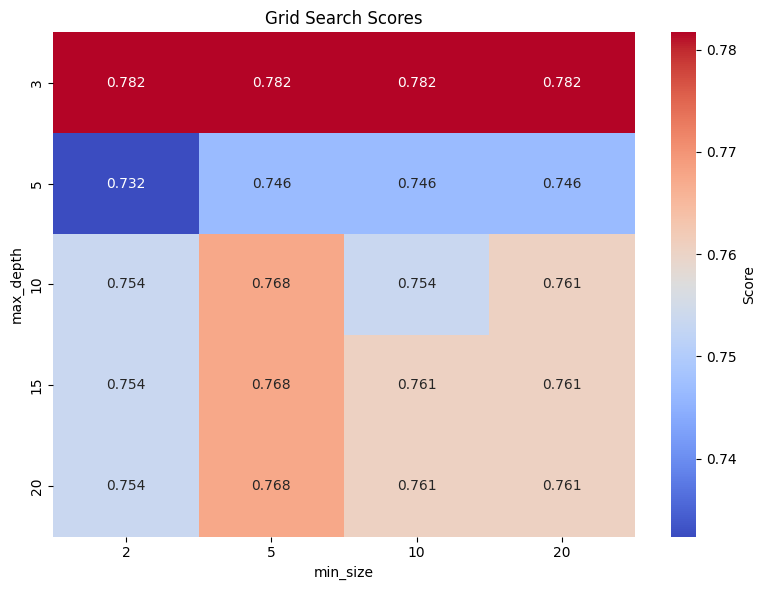

[[0.61971831 0.70422535 0.77464789 0.78873239]
 [0.6971831  0.76056338 0.78169014 0.78873239]
 [0.70422535 0.77464789 0.78873239 0.78873239]
 [0.76056338 0.78169014 0.78873239 0.78873239]]


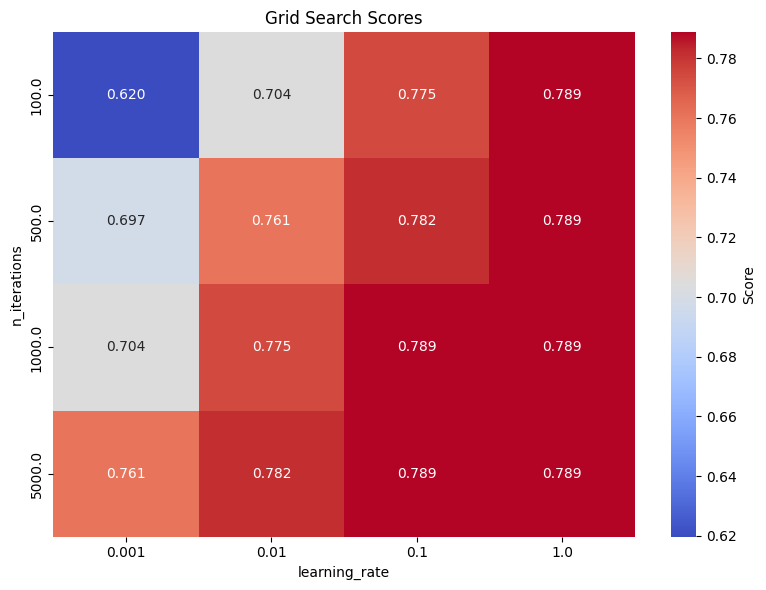

In [4]:
X_titanic, y_titanic = load_dataset('../datasets/Titanic-Dataset.csv',sep=',',target_col=1, header=True)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_titanic, y_titanic, 0.2, 2108)
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_train_t, y_train_t, 0.2, 2108)

# Create instances of your models
knn_model_t = KNearestNeighbours()
tree_model_t = ClassificationTree()
softmax_model_t = SoftmaxRegression()

# Create GridSearch objects for each model
knn_grid_search = GridSearch(knn_model_t)
tree_grid_search = GridSearch(tree_model_t)
softmax_grid_search = GridSearch(softmax_model_t)

#Pre-preprocess

categorical_columns = [3,7,9]  # Indices of categorical columns (Pclass, Name, Sex, Ticket, Cabin)
numerical_columns = [4, 5, 6, 8]      # Indices of numerical columns (Age, SibSp, Parch, Fare)
ordinal_columns = [1]                 # Indices of ordinal columns (Pclass)

categorical_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

numerical_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("converter", NumericConverter()),
    ("scaler", MinMaxScaler())
])

ordinal_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

preprocessor = CombinedPreprocessor(
    categorical=(categorical_pipeline, categorical_columns),
    numerical=(numerical_pipeline, numerical_columns),
    ordinal=(ordinal_pipeline, ordinal_columns) 
)

X_train_t = preprocessor.fit_transform(X_train_t)
X_val_t = preprocessor.transform(X_val_t)
X_test_t = preprocessor.transform(X_test_t)

# Perform grid search for each model
knn_grid_search.fit(X_train_t, y_train_t, X_val_t, y_val_t)
tree_grid_search.fit(X_train_t, y_train_t, X_val_t, y_val_t)
softmax_grid_search.fit(X_train_t, y_train_t, X_val_t, y_val_t)

knn_grid_search.plot_param_grid_heatmap()
tree_grid_search.plot_param_grid_heatmap()
softmax_grid_search.plot_param_grid_heatmap()

best_knn_t = knn_grid_search.best_model_
best_tree_t = tree_grid_search.best_model_
best_softmax_t = softmax_grid_search.best_model_



In [5]:
print("Optimal KNN fold scores on Titanic: ", k_folds_accuracy_score(best_knn_model,X_titanic, y_titanic, 5, 2108, preprocessor), k_folds_accuracy_score(best_knn_model,X_titanic, y_titanic, 5, 8042, preprocessor), k_folds_accuracy_score(best_knn_model,X_titanic, y_titanic, 5, 9876, preprocessor))
print("Optimal Tree fold scores on Titanic: ", k_folds_accuracy_score(best_tree_model,X_titanic, y_titanic, 5, 2108, preprocessor), k_folds_accuracy_score(best_tree_model,X_titanic, y_titanic, 5, 8042, preprocessor), k_folds_accuracy_score(best_tree_model,X_titanic, y_titanic, 5, 9876, preprocessor))
print("Optimal Softmax fold scores on Titanic: ", k_folds_accuracy_score(best_softmax_model,X_titanic, y_titanic, 5, 2108, preprocessor), k_folds_accuracy_score(best_softmax_model,X_titanic, y_titanic, 5, 8042, preprocessor), k_folds_accuracy_score(best_softmax_model,X_titanic, y_titanic, 5, 9876, preprocessor))

Optimal KNN fold scores on Titanic:  0.7721737492938296 0.7564308580754504 0.7879040863724813
Optimal Tree fold scores on Titanic:  0.7991086560793421 0.8226476680685456 0.8147887765990836
Optimal Softmax fold scores on Titanic:  0.7968551879982424 0.8035277132634485 0.7990961019396146


Softmax Regression - Best Parameters:
{'n_iterations': 5000, 'learning_rate': 0.1}
Softmax Regression - Best Score:
0.875
[[0.67857143 0.67857143 0.76785714 0.67857143]
 [0.67857143 0.69642857 0.82142857 0.69642857]
 [0.67857143 0.76785714 0.85714286 0.71428571]
 [0.69642857 0.82142857 0.875      0.71428571]]


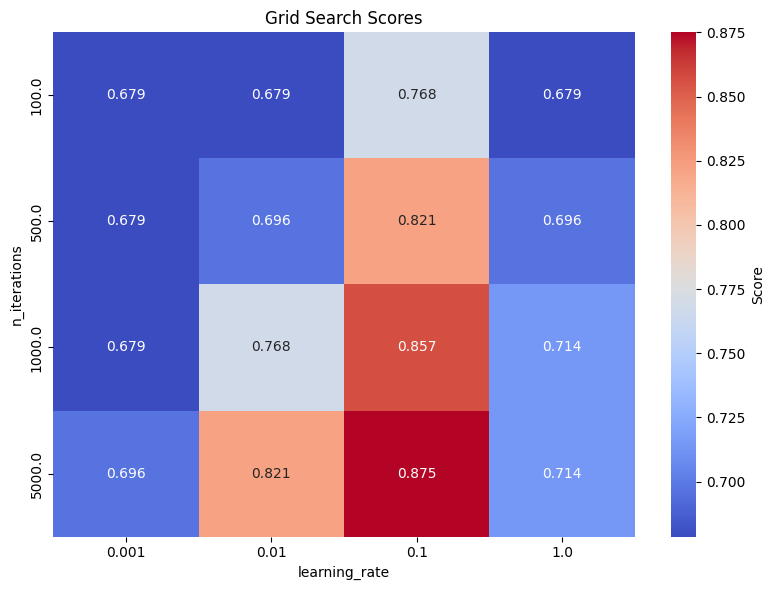

In [6]:
model_l = SoftmaxRegression()

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_iterations': [100, 500, 1000],
    'lambda': [0.001, 0.01, 0.1, 1]  # Adding lambda as a regularization strength hyperparameter
}

softmax_l = GridSearch(model_l)
softmax_l.fit(X_train, y_train, X_val, y_val)

print("Softmax Regression - Best Parameters:")
print(softmax_l.best_params_)
print("Softmax Regression - Best Score:")
print(softmax_l.best_score_)

softmax_l.plot_param_grid_heatmap()
